In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings 
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [24]:
train = pd.read_csv('/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/train.csv')

In [25]:
test = pd.read_csv('/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/test.csv')

In [26]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,1077.855000,2.655833,66.261667,2.716667,2.125833,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,580.185495,1.139502,20.257801,0.675847,1.185821,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,12.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,699.000000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,1059.000000,3.000000,67.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,1591.000000,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,2060.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [27]:
train.shape

(1200, 34)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EmployeeNumber            1200 non-null   int64  
 9   EnvironmentSatisfaction   1200 non-null   int64  
 10  Gender                    1200 non-null   object 
 11  HourlyRate                1200 non-null   int64  
 12  JobInvolvement            1200 non-null   int64  
 13  JobLevel                  1200 non-null   int64  
 14  JobRole 

In [29]:
print(train.shape)

(1200, 34)


In [30]:
display(train)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,1291,4,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,1587,2,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,1591,2,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1572,1,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,981,2,...,80,1,8,3,3,1,0,0,0,0


In [53]:
 cal_categoric = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Attrition']
train_numeric  = train.drop(cal_categoric, axis = 1)
train_categoric = train[cal_categoric]
print(train_categoric)
print(train_categoric['Attrition'].value_counts())

         BusinessTravel              Department    EducationField  Gender  \
0         Travel_Rarely  Research & Development           Medical    Male   
1         Travel_Rarely  Research & Development  Technical Degree    Male   
2         Travel_Rarely         Human Resources     Life Sciences    Male   
3         Travel_Rarely  Research & Development           Medical  Female   
4         Travel_Rarely  Research & Development           Medical    Male   
...                 ...                     ...               ...     ...   
1195      Travel_Rarely  Research & Development           Medical    Male   
1196  Travel_Frequently  Research & Development             Other    Male   
1197         Non-Travel         Human Resources     Life Sciences    Male   
1198  Travel_Frequently                   Sales         Marketing    Male   
1199      Travel_Rarely  Research & Development     Life Sciences  Female   

                        JobRole MaritalStatus Over18 OverTime  Attrition  


In [98]:
train_numeric.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,1077.855000,2.655833,66.261667,2.716667,2.125833,...,2.616667,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000
std,575.726036,8.282199,415.420917,8.134144,1.060390,580.185495,1.139502,20.257801,0.675847,1.185821,...,1.066460,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225
min,0.000000,17.000000,59.231581,-0.023999,1.000000,12.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,699.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,1059.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,1591.000000,4.000000,84.000000,3.000000,3.000000,...,3.250000,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,2060.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000


<AxesSubplot:>

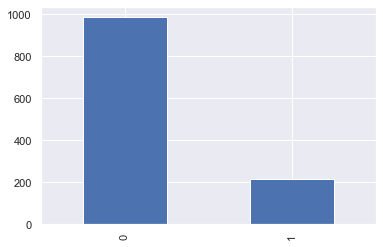

In [58]:
counts_Attrition = train_categoric['Attrition'].value_counts()
counts_Attrition.plot(kind = 'bar')

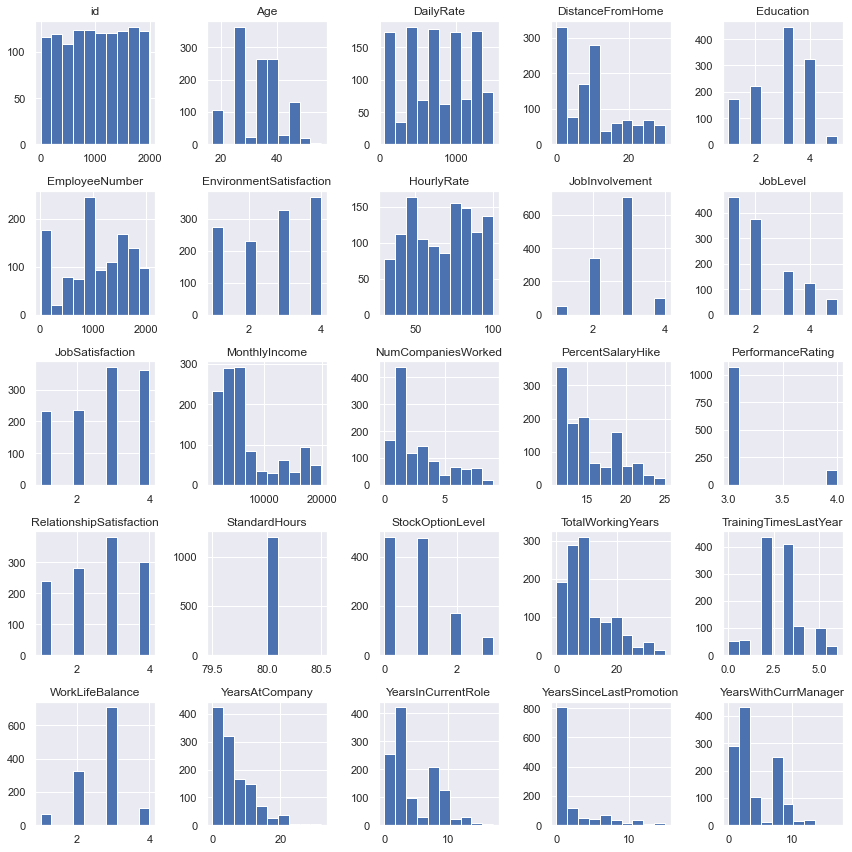

In [66]:
train_numeric.hist(figsize=(12,12))
plt.tight_layout()

In [67]:
train_tmp = pd.concat([train_categoric['Attrition'],train_numeric],axis = 1)
print(train_tmp.head(5))

   Attrition  id  Age    DailyRate  DistanceFromHome  Education  \
0          0   0   26   450.941476          7.601074          3   
1          0   3   47   730.235896         26.739489          3   
2          0   7   26  1082.560066          7.374739          3   
3          1  10   46   706.247579         14.791373          1   
4          0  11   25   500.610860          2.146966          4   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0            1291                        4          43               2  ...   
1            1587                        2          98               2  ...   
2            1591                        2          84               2  ...   
3            1572                        1          79               2  ...   
4             981                        2          98               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                

In [70]:
print(train_tmp.query('Attrition == 0').head())
print(train_tmp.query('Attrition == 1').head())

   Attrition  id  Age    DailyRate  DistanceFromHome  Education  \
0          0   0   26   450.941476          7.601074          3   
1          0   3   47   730.235896         26.739489          3   
2          0   7   26  1082.560066          7.374739          3   
4          0  11   25   500.610860          2.146966          4   
5          0  12   36  1025.521404          1.689570          3   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0            1291                        4          43               2  ...   
1            1587                        2          98               2  ...   
2            1591                        2          84               2  ...   
4             981                        2          98               3  ...   
5            1027                        1          48               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                

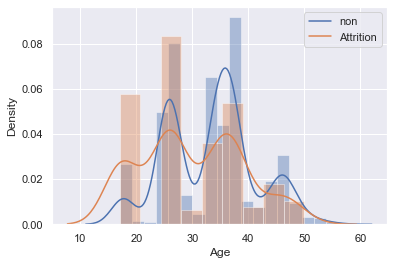

In [76]:
train_Age_non = train_tmp.query('Attrition ==0')['Age']
train_Age_Attrition = train_tmp.query('Attrition == 1')['Age']
sns.distplot(train_Age_non)
sns.distplot(train_Age_Attrition)
plt.legend(labels=["non", "Attrition"], loc='upper right')
plt.show()

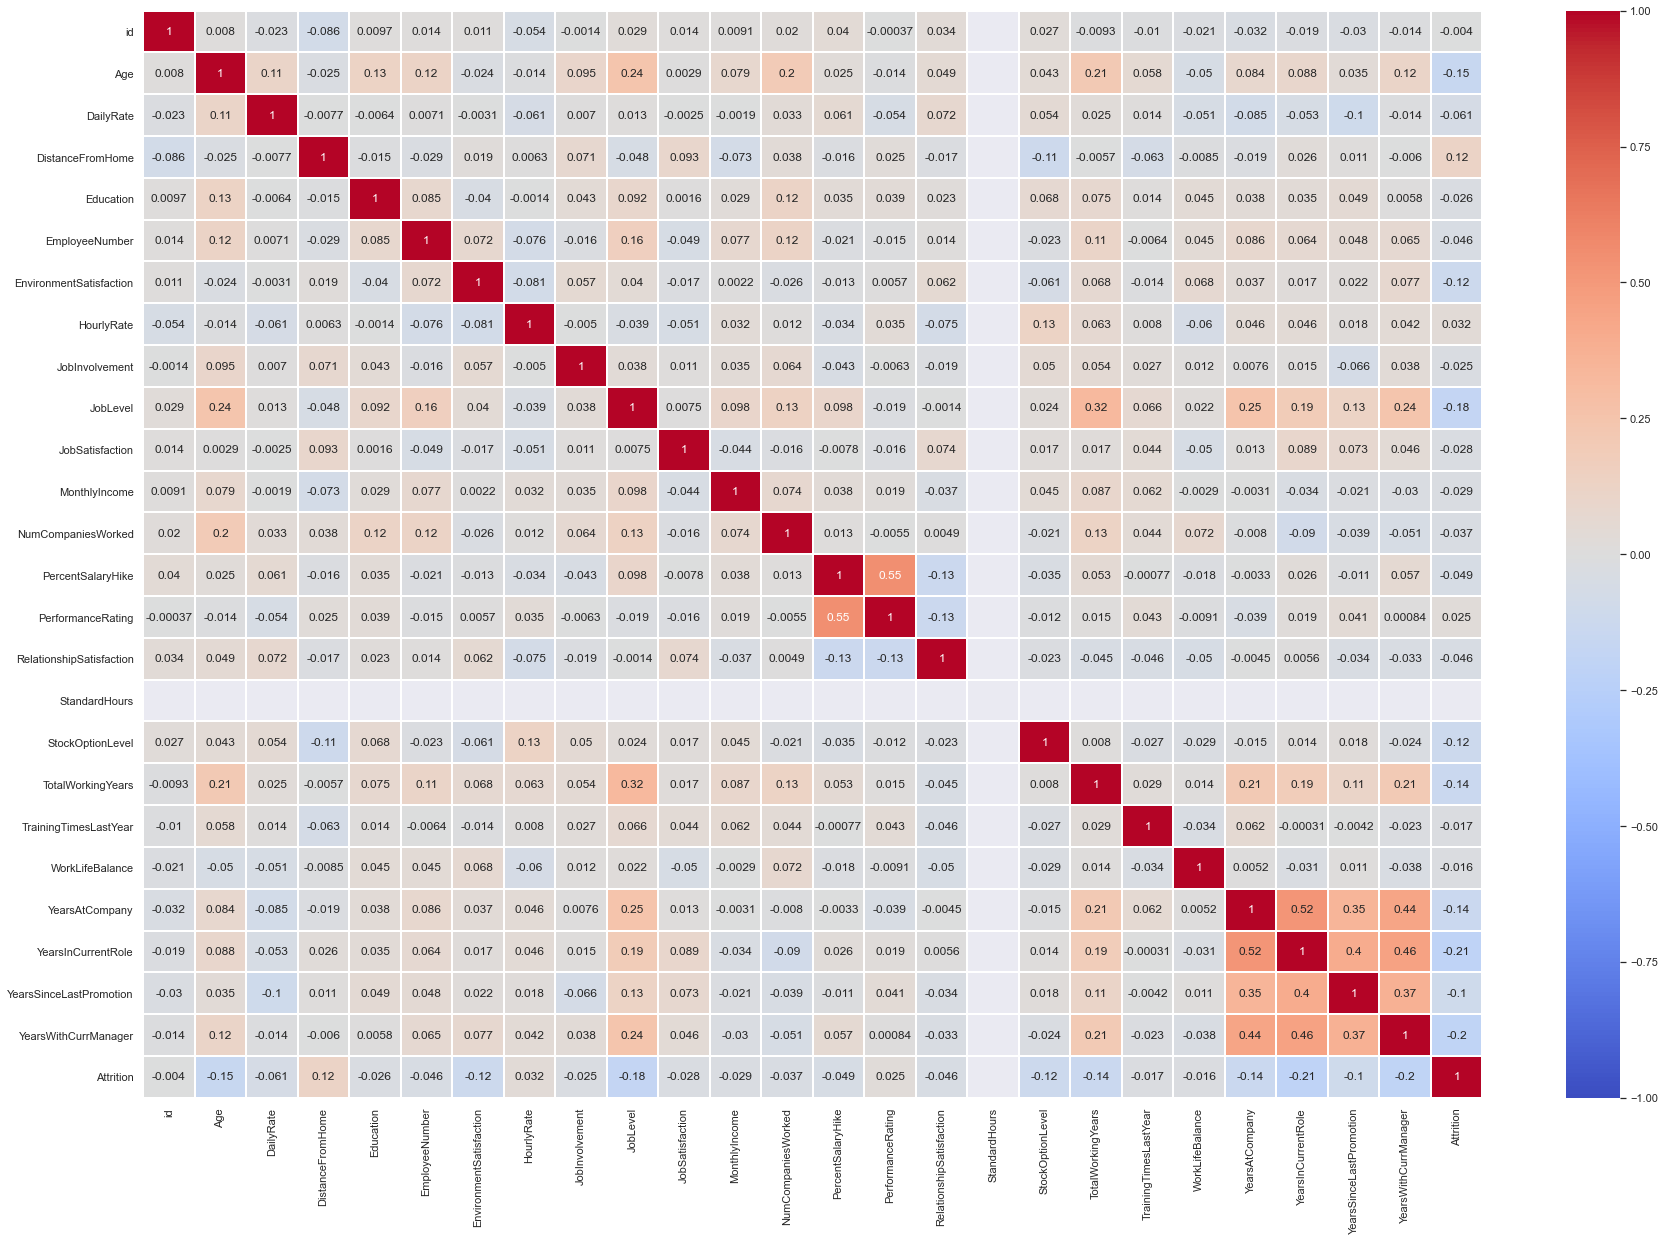

In [97]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

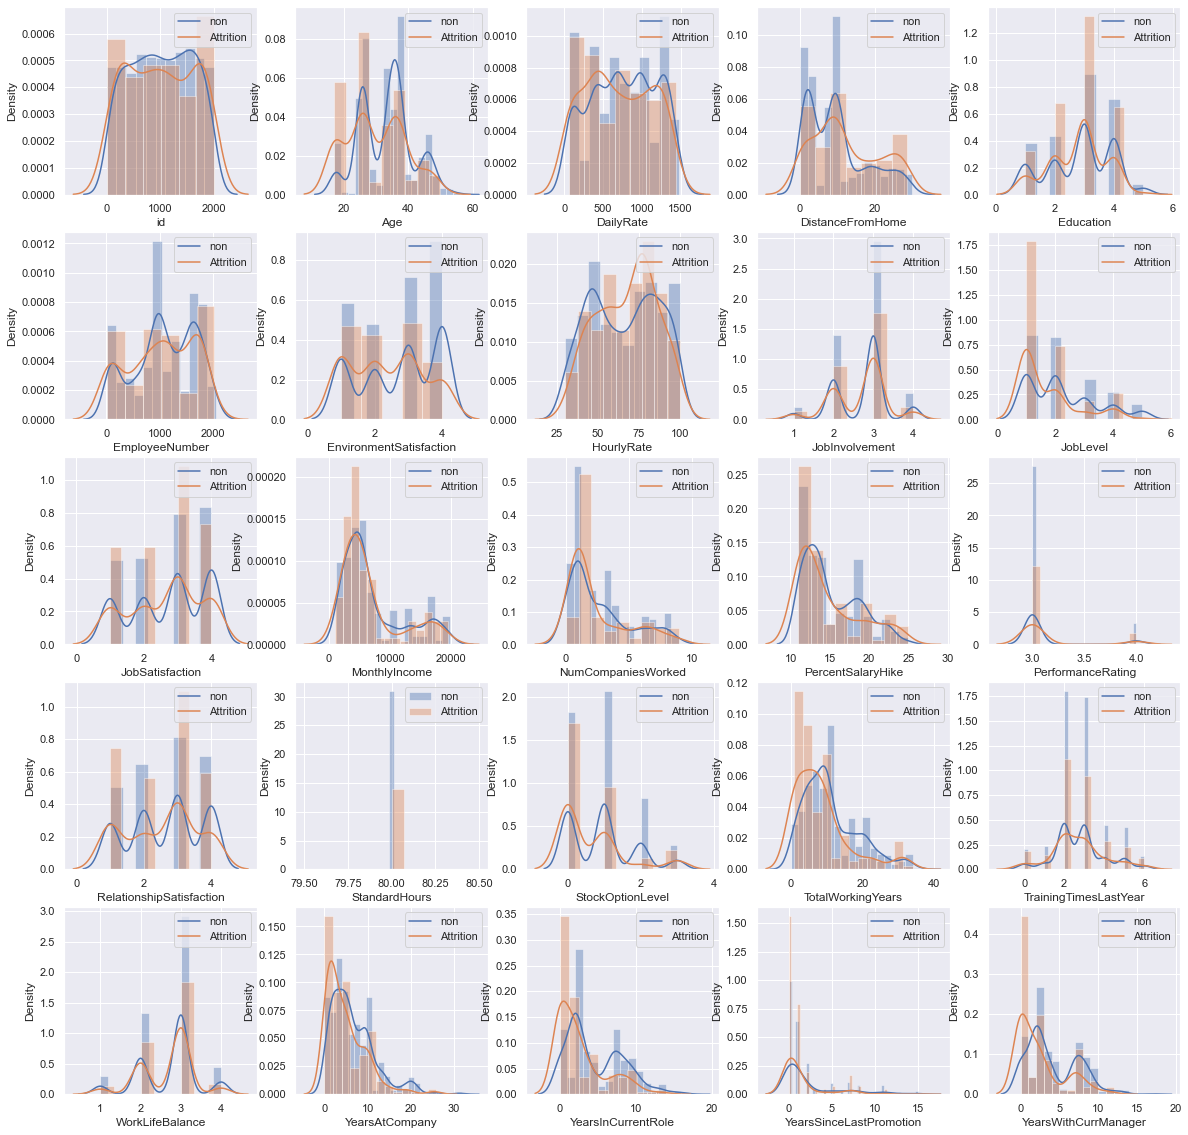

In [86]:
plt.figure(figsize=(20, 20))

for ncol, colname in enumerate(train_numeric.columns):
    plt.subplot(5,5, ncol+1)
    sns.distplot(train_tmp.query("Attrition==0")[colname])
    sns.distplot(train_tmp.query("Attrition==1")[colname])
    plt.legend(labels=["non", "Attrition"], loc='upper right')
plt.show()

In [104]:
X = train.drop('Attrition',axis =1)
y = train['Attrition']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =1)

In [106]:
X_train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.0,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,1018.604167,32.713542,747.566704,10.219854,2.847917,1094.336458,2.640625,66.160417,2.723958,2.137500,...,2.614583,80.0,0.855208,10.591667,2.755208,2.700000,6.457292,4.291667,2.193750,3.815625
std,574.130776,8.274754,413.229053,8.047215,1.056188,574.141027,1.148520,20.296994,0.671053,1.205587,...,1.069726,0.0,0.877760,7.719667,1.249598,0.710123,5.277715,3.689222,3.384927,3.310861
min,0.000000,17.000000,59.231581,-0.023999,1.000000,12.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,532.500000,26.000000,403.208688,2.673705,2.000000,705.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,1030.000000,34.000000,729.680919,9.414854,3.000000,1085.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1516.250000,37.000000,1080.628068,15.231438,4.000000,1591.000000,4.000000,84.000000,3.000000,3.000000,...,3.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,2060.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,32.000000,17.000000,15.000000,17.000000


In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 25)
(240, 25)
(960,)
(240,)


In [108]:
n_train0, n_train1 = len(train[train['Attrition'] == 0]), len(train[train['Attrition'] == 1])
n_all = n_train0+n_train1
print('train0 の割合 :',n_train0/n_all) # train0(離職しなかった人)の割合
print('train1 の割合 :',n_train1/n_all) # train1(離職者)の割合

train0 の割合 : 0.8225
train1 の割合 : 0.1775


In [109]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)

In [110]:
# 真値と予測値の表示
test_pred = pd.DataFrame({'train':y_test,'test_pred':y_test_pred})
display(test_pred)

# 真値と予測確率の表示
test_pred_prob = pd.DataFrame({'train':y_test, 'train0_prob':y_test_pred_proba[:,0], 'train1_prob':y_test_pred_proba[:,1]})
display(test_pred_prob)

,train,test_pred
636,0,0
683,0,0
1033,0,0
190,0,0
1083,0,0


,train,train0_prob,train1_prob
636,0,0.989308,0.010692
683,0,0.947924,0.052076
1033,0,0.555132,0.444868
190,0,0.978241,0.021759
1083,0,0.971641,0.028359


In [111]:
acc = accuracy_score(y_test,y_test_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_test_pred_proba) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_test_pred_proba[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.8458333333333333
logloss : 0.4505654853805799
AUC : 0.8280014165978042


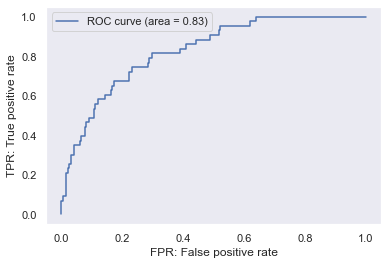

In [112]:
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_proba[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [113]:
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)

In [114]:
# 真値と予測値の表示
train_pred = pd.DataFrame({'train':y_train,'test_pred':y_train_pred})
display(train_pred)

# 真値と予測確率の表示
train_pred_prob = pd.DataFrame({'train':y_train, 'train0_prob':y_train_pred_proba[:,0], 'train1_prob':y_train_pred_proba[:,1]})
display(train_pred_prob)

,train,test_pred
1184,0,0
771,0,0
329,0,0
587,0,0
746,0,0


,train,train0_prob,train1_prob
1184,0,0.996896,0.003104
771,0,0.999651,0.000349
329,0,0.999464,0.000536
587,0,0.999700,0.000300
746,0,0.996497,0.003503


In [115]:
acc = accuracy_score(y_train,y_train_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_train,y_train_pred_proba) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_train,y_train_pred_proba[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 1.0
logloss : 0.013358039122208905
AUC : 1.0


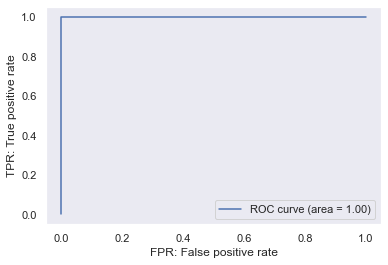

In [116]:
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train,y_train_pred_proba[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [117]:
Z = test
pred = model.predict(Z)

In [118]:
print(pred)

[0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 

In [119]:
sample_submit = pd.read_csv("/Users/8skiphone/Desktop/Competition/SIGNATE/従業員の離職予測/sample_submit.csv", index_col=0, header=None) # 応募用サンプルファイル

In [120]:
sample_submit

,1
0,
1,0
2,0
4,0
5,0
6,0
...,...
1991,0
1992,0
1993,0


In [121]:
sample_submit[1] = pred
sample_submit.to_csv('submit.csv', header=None)

In [122]:
sample_submit

,1
0,
1,0
2,1
4,0
5,0
6,0
...,...
1991,0
1992,0
1993,0
